In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("D:\\machine learning\\Datasets\\loan_data.csv")

In [3]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


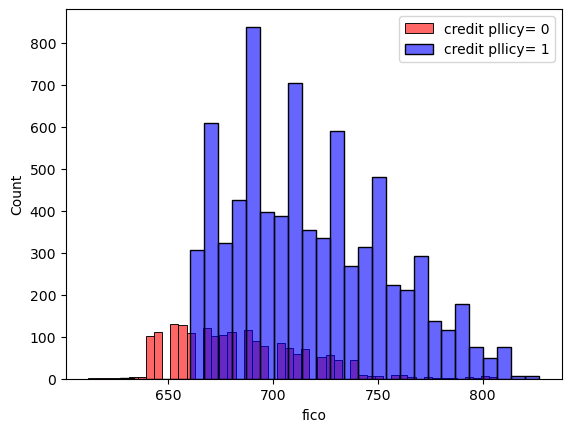

In [15]:
sns.histplot(data= data[data["credit.policy"]==0]["fico"], color='red', bins=50,
                                            label="credit pllicy= 0", 
                                            alpha=.6)
sns.histplot(data= data[data["credit.policy"]==1]["fico"], color='blue', bins=30,
             label="credit pllicy= 1", alpha=.6)
plt.legend()
#plt.figure(edgecolor="black")

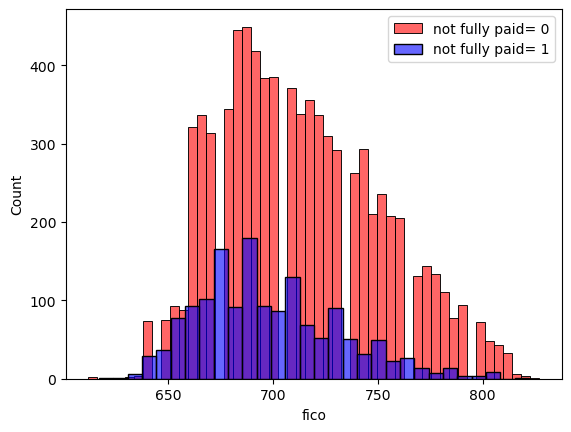

In [17]:
sns.histplot(data= data[data["not.fully.paid"]==0]["fico"], color='red', bins=50,
                                            label="not fully paid= 0", 
                                            alpha=.6)
sns.histplot(data= data[data["not.fully.paid"]==1]["fico"], color='blue', bins=30,
             label="not fully paid= 1", alpha=.6)
plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

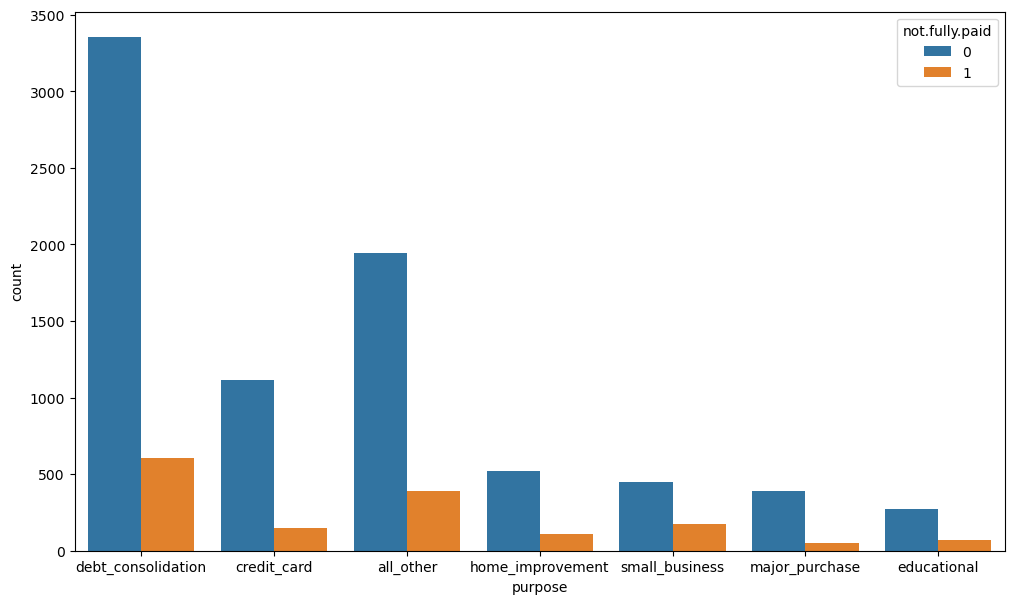

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x="purpose", hue="not.fully.paid", data=data )

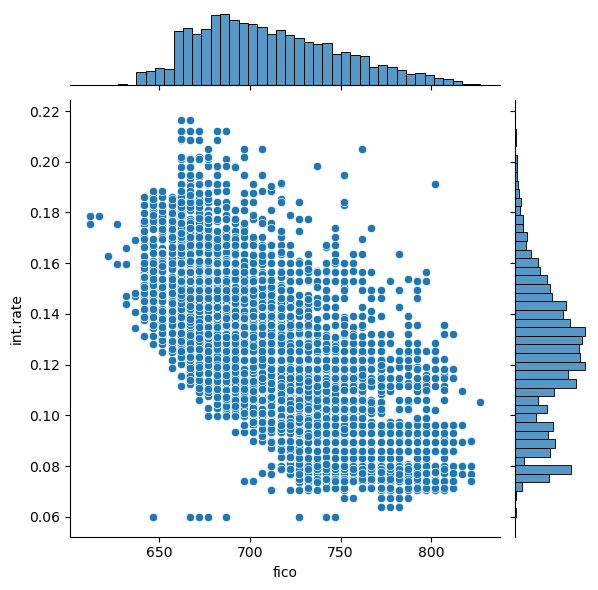

In [26]:
sns.jointplot(x="fico", y="int.rate", data=data)

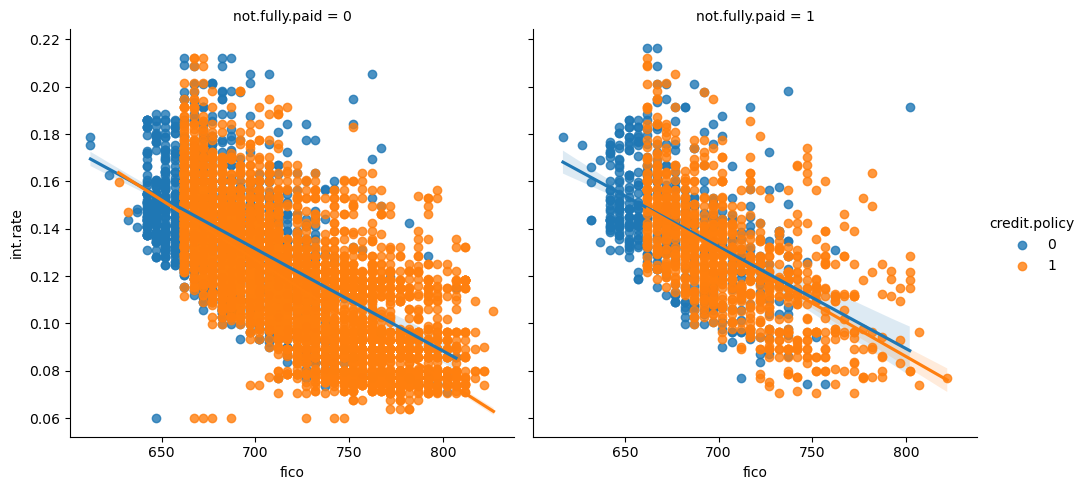

In [28]:
sns.lmplot(x="fico", y="int.rate", data=data, hue="credit.policy", col="not.fully.paid") 

In [29]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [30]:
#here purpose column is categorical data so it will change numerical veriable use dummy

In [31]:
cat_feats= ["purpose"]

In [32]:
final_data= pd.get_dummies(data, columns=cat_feats, drop_first=True)

In [33]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X= final_data.drop("not.fully.paid", axis=1)
y= final_data["not.fully.paid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dTree= DecisionTreeClassifier(criterion="entropy", )

In [44]:
dTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
dPredict= dTree.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix


In [47]:
print(classification_report(y_test, dPredict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.22      0.22      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [50]:
confusion_matrix(y_test, dPredict)

array([[2235,  415],
       [ 397,  114]], dtype=int64)

<AxesSubplot:>

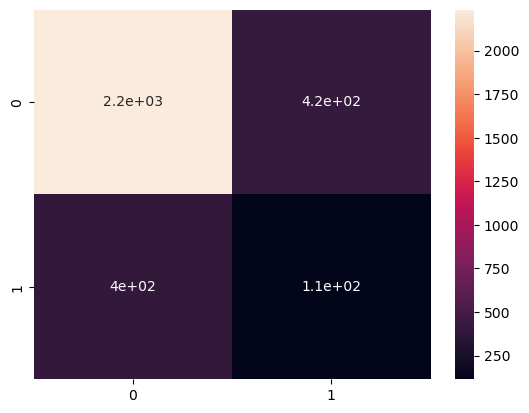

In [49]:
sns.heatmap(confusion_matrix(y_test, dPredict), annot=True)

In [51]:
#Random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc= RandomForestClassifier(n_estimators=400)

In [55]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [56]:
rPredict= rfc.predict(X_test)

In [57]:
print(classification_report(y_test, rPredict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.35      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161



In [58]:
print(confusion_matrix(y_test, rPredict))

[[2635   15]
 [ 503    8]]


<AxesSubplot:>

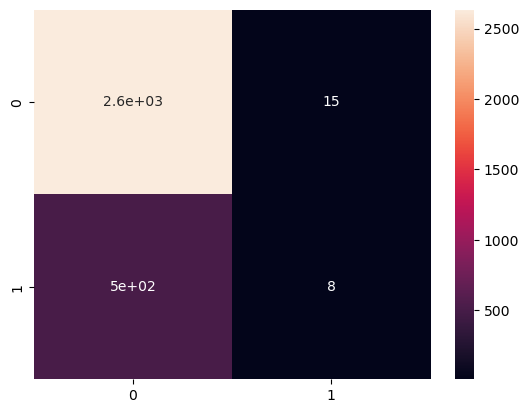

In [59]:
sns.heatmap(confusion_matrix(y_test, rPredict), annot=True)

In [60]:
# Random Forest - HyperParameter

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [65]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [66]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [67]:
grid.fit(X_train,y_train)

C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Laptop\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [68]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': True}

In [69]:
predictions = grid.predict(X_test)

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.46      0.01      0.02       511

    accuracy                           0.84      3161
   macro avg       0.65      0.50      0.47      3161
weighted avg       0.78      0.84      0.77      3161



<AxesSubplot:>

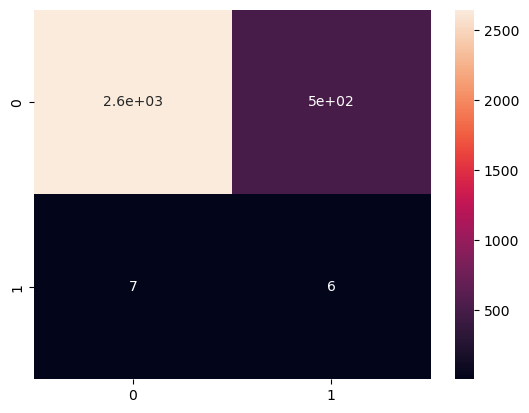

In [76]:
sns.heatmap(confusion_matrix(predictions,y_test), annot=True)

In [77]:
grid.best_estimator_.oob_score_

0.8390213495402836

In [78]:
#Understanding Number of Estimators (Trees)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

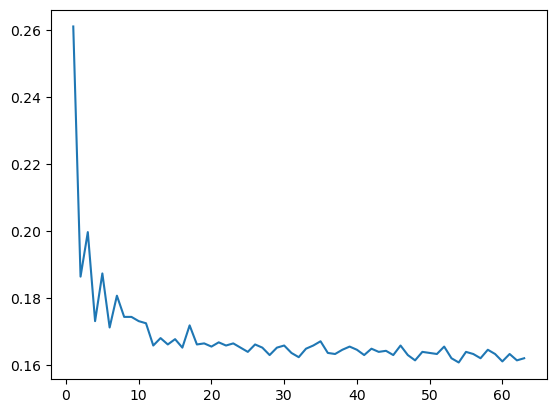

In [81]:
plt.plot(range(1,64),errors)

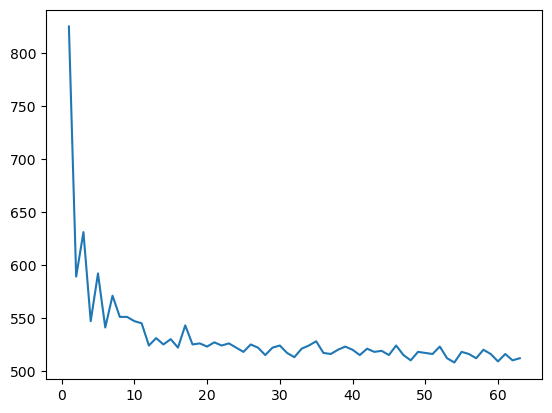

In [82]:
plt.plot(range(1,64),misclassifications)